In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

26.588821608289322 -81.95692461322369
-51.68371916335403 151.12456624513976
57.975387001223226 -40.53416921974079
-31.53680134627308 150.51362959462085
54.17194247184145 -3.45738198016096
58.10779662429019 -112.20313832908872
-32.15894604408867 -102.86298473052398
73.71081996107245 109.69814496245766
-28.379802416732005 -40.32195947014608
-5.451767475099757 168.55140180976235
-18.639688513430258 165.6212469809184
8.789861134049517 -110.88054125047526
-1.261274766042149 115.80195284244297
55.79790903236457 76.4382066622847
14.253209999977457 -63.61914089223956
25.573688227719003 -177.07276409566038
13.392723076721424 1.7166625514516056
49.14631097447878 -107.63448461594527
19.480299081268754 113.54761804389807
-11.560328489550159 -175.400749295175
6.002457864174403 -119.38468449630977
4.766143855346797 99.64242033994333
-66.53355604152303 110.49630403721522
-66.18998910821766 -104.04706722278372
32.50365784504375 174.55267816518426
25.524720836842278 -71.14179067169647
70.99381163892474

-47.45212614057642 -14.268546964891726
-40.63051451848297 61.17457805665532
-3.0709829904388215 57.431497421927276
-31.05546181432647 -46.054922582776896
33.834264112282 -112.18284285440718
26.2203194680703 -104.07256619103111
-77.9312286925318 -145.03959895304286
-31.57216971624056 176.0278396599561
54.39713032093087 -63.09605360879965
-50.83360121012111 33.05199567079026
-61.15799589267322 -96.21862834054316
78.33498059610929 -178.99114619802523
9.493538455708446 -41.359886523360444
60.80556502117099 79.37129591737022
-68.67144286199809 169.56702438488497
-59.19084228502042 23.988204268352916
-61.744117197684176 150.31177955296187
-45.17253441790879 -13.84805665186883
-18.919798385276295 -11.090477426778108
56.70011403031745 101.60522716002396
-36.25141041350224 98.28949391368923
79.57690886336363 104.5477592010451
64.1613852143796 99.44517919920281
61.29148945750745 171.19296774940835
-60.363623192098316 27.46278149142404
60.343468111979604 99.49303259172086
-21.256886360872215 36.3

61.11658163587208 -143.86744912003942
-43.241797148214346 -65.6124059491872
72.02649953441636 20.62366664345589
-4.131162270349421 11.882047661438662
63.55983919587575 118.98193939049753
15.120809062396276 92.47725211942628
50.86953351396275 -161.69612934724503
-79.67295324673566 -129.1687659264693
73.99520481842225 -30.569673880364263
3.3114091961992074 67.01097384886901
59.193293158370125 153.49878421947312
-70.24219813300948 47.974918297345795
74.06939689119423 8.030939857520167
89.8323670035698 117.95813386423333
-68.95302152917645 -18.97835798393305
-25.505275012666075 -26.486972495874085
20.166131348918825 139.35185592361785
-71.89958252660136 117.47145770619454
72.53102508476516 103.9495338398088
80.821855663874 -116.5872671549784
11.202030466283645 67.3013444373062
-69.54706189265227 31.64433776944486


In [6]:
from citipy import citipy

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b7155d5eb48ca0c99aad0dd60832d272


In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | cape coral
Processing Record 2 of Set 13 | hobart
Processing Record 3 of Set 13 | nanortalik
Processing Record 4 of Set 13 | tamworth
Processing Record 5 of Set 13 | whitehaven
Processing Record 6 of Set 13 | athabasca
Processing Record 7 of Set 13 | lebu
Processing Record 8 of Set 13 | saskylakh
Processing Record 9 of Set 13 | arraial do cabo
Processing Record 10 of Set 13 | lata
Processing Record 11 of Set 13 | pouebo
Processing Record 12 of Set 13 | san patricio
Processing Record 13 of Set 13 | balikpapan
Processing Record 14 of Set 13 | vengerovo
Processing Record 15 of Set 13 | pointe michel
Processing Record 16 of Set 13 | kapaa
Processing Record 17 of Set 13 | niamey
Processing Record 18 of Set 13 | shaunavon
Processing Record 19 of Set 13 | zhuhai
Processing Record 20 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 21 of Set 13 | cabo san lucas
Processing Record 22 of S

Processing Record 34 of Set 16 | chilca
Processing Record 35 of Set 16 | kenai
Processing Record 36 of Set 16 | atuona
Processing Record 37 of Set 16 | bull savanna
Processing Record 38 of Set 16 | juneau
Processing Record 39 of Set 16 | kyakhta
Processing Record 40 of Set 16 | havre-saint-pierre
Processing Record 41 of Set 16 | samalaeulu
City not found. Skipping...
Processing Record 42 of Set 16 | nyurba
Processing Record 43 of Set 16 | lypova dolyna
Processing Record 44 of Set 16 | bengkulu
Processing Record 45 of Set 16 | nyzhnya duvanka
Processing Record 46 of Set 16 | dunedin
Processing Record 47 of Set 16 | ayolas
Processing Record 48 of Set 16 | sorland
Processing Record 49 of Set 16 | mar del plata
Processing Record 50 of Set 16 | luderitz
Processing Record 1 of Set 17 | ust-tarka
Processing Record 2 of Set 17 | namatanai
Processing Record 3 of Set 17 | kiama
Processing Record 4 of Set 17 | itanhem
Processing Record 5 of Set 17 | byron bay
Processing Record 6 of Set 17 | selty

Processing Record 21 of Set 20 | caravelas
Processing Record 22 of Set 20 | cayenne
Processing Record 23 of Set 20 | homer
Processing Record 24 of Set 20 | toora-khem
Processing Record 25 of Set 20 | jabinyanah
Processing Record 26 of Set 20 | sun city west
Processing Record 27 of Set 20 | mapimi
Processing Record 28 of Set 20 | mys shmidta
City not found. Skipping...
Processing Record 29 of Set 20 | carutapera
Processing Record 30 of Set 20 | strezhevoy
Processing Record 31 of Set 20 | bratsk
Processing Record 32 of Set 20 | kamenskoye
City not found. Skipping...
Processing Record 33 of Set 20 | kodinsk
Processing Record 34 of Set 20 | beira
Processing Record 35 of Set 20 | jarjis
City not found. Skipping...
Processing Record 36 of Set 20 | mehamn
Processing Record 37 of Set 20 | abha
Processing Record 38 of Set 20 | mindelo
Processing Record 39 of Set 20 | richards bay
Processing Record 40 of Set 20 | vanavara
Processing Record 41 of Set 20 | menongue
Processing Record 42 of Set 20 |

Processing Record 5 of Set 24 | shihezi
Processing Record 6 of Set 24 | lexington
Processing Record 7 of Set 24 | birao
Processing Record 8 of Set 24 | udachnyy
Processing Record 9 of Set 24 | ushtobe
Processing Record 10 of Set 24 | waseca
Processing Record 11 of Set 24 | umkomaas
Processing Record 12 of Set 24 | bam
Processing Record 13 of Set 24 | atar
Processing Record 14 of Set 24 | sabya
Processing Record 15 of Set 24 | iquique
Processing Record 16 of Set 24 | bayji
Processing Record 17 of Set 24 | ahvaz
Processing Record 18 of Set 24 | aklavik
Processing Record 19 of Set 24 | shubarkuduk
Processing Record 20 of Set 24 | vestmannaeyjar
Processing Record 21 of Set 24 | kachikau
City not found. Skipping...
Processing Record 22 of Set 24 | nome
Processing Record 23 of Set 24 | avera
Processing Record 24 of Set 24 | charlottesville
Processing Record 25 of Set 24 | satitoa
City not found. Skipping...
Processing Record 26 of Set 24 | hualmay
Processing Record 27 of Set 24 | stoke-on-tr

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Coral,26.5629,-81.9495,84.00,61,0,6.91,US,2022-10-30 23:26:34
1,Hobart,-42.8794,147.3294,67.86,64,20,24.16,AU,2022-10-30 23:21:45
2,Nanortalik,60.1432,-45.2371,25.50,69,99,8.97,GL,2022-10-30 23:26:34
3,Tamworth,52.6340,-1.6959,54.52,91,77,7.00,GB,2022-10-30 23:25:25
4,Whitehaven,54.5490,-3.5841,54.66,100,21,14.00,GB,2022-10-30 23:26:35
5,Athabasca,54.7169,-113.2854,48.61,35,49,17.52,CA,2022-10-30 23:26:35
6,Lebu,-37.6167,-73.6500,50.94,74,0,23.78,CL,2022-10-30 23:26:36
7,Saskylakh,71.9167,114.0833,4.37,97,98,5.06,RU,2022-10-30 23:26:36
8,Arraial Do Cabo,-22.9661,-42.0278,74.59,90,41,27.85,BR,2022-10-30 23:26:37
9,Lata,40.1629,-8.3327,63.81,76,100,3.85,PT,2022-10-30 23:26:37


In [15]:
city_data_df2=city_data_df[['City','Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

In [17]:
city_data_df=city_data_df2
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Coral,US,2022-10-30 23:26:34,26.5629,-81.9495,84.00,61,0,6.91
1,Hobart,AU,2022-10-30 23:21:45,-42.8794,147.3294,67.86,64,20,24.16
2,Nanortalik,GL,2022-10-30 23:26:34,60.1432,-45.2371,25.50,69,99,8.97
3,Tamworth,GB,2022-10-30 23:25:25,52.6340,-1.6959,54.52,91,77,7.00
4,Whitehaven,GB,2022-10-30 23:26:35,54.5490,-3.5841,54.66,100,21,14.00


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

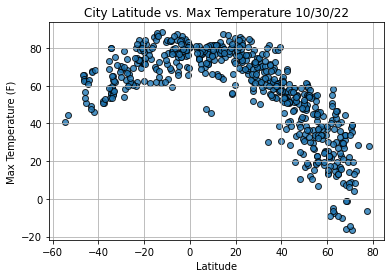

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

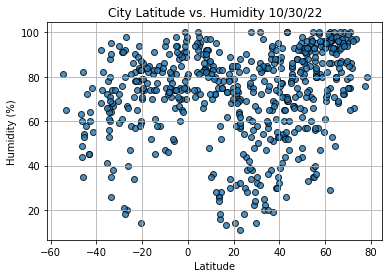

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

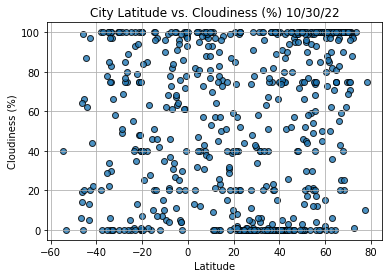

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

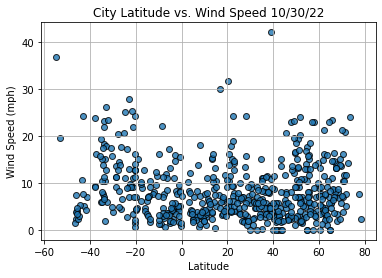

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Coral,US,2022-10-30 23:26:34,26.5629,-81.9495,84.00,61,0,6.91
2,Nanortalik,GL,2022-10-30 23:26:34,60.1432,-45.2371,25.50,69,99,8.97
3,Tamworth,GB,2022-10-30 23:25:25,52.6340,-1.6959,54.52,91,77,7.00
4,Whitehaven,GB,2022-10-30 23:26:35,54.5490,-3.5841,54.66,100,21,14.00
5,Athabasca,CA,2022-10-30 23:26:35,54.7169,-113.2854,48.61,35,49,17.52


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

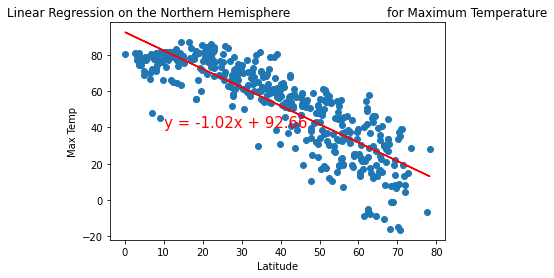

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

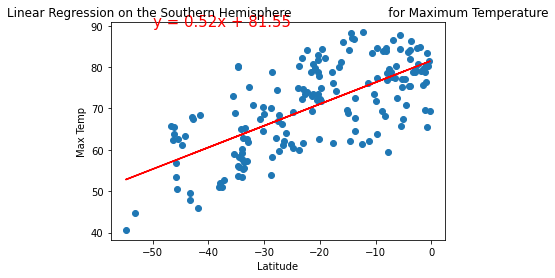

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

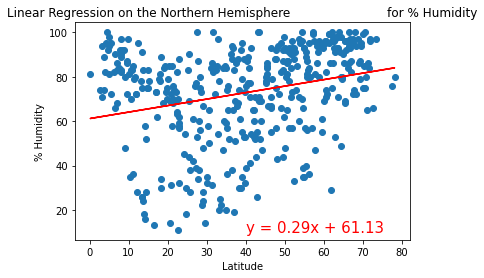

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

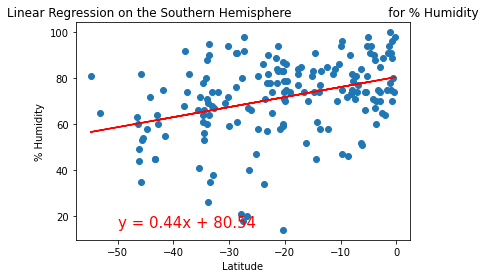

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

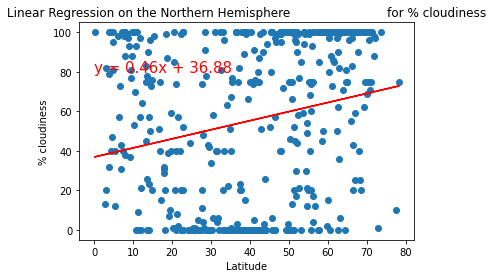

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % cloudiness', '% cloudiness',(0,80))

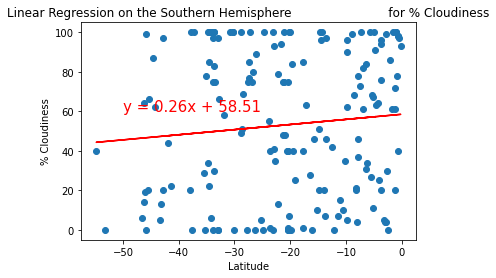

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

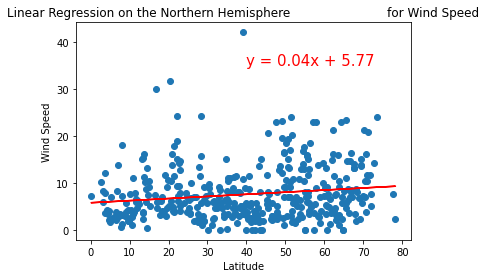

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

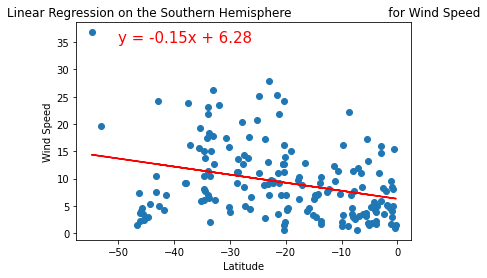

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))